In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from functions import (
    obj_segments,
    obj_segments_2,
    obj_segments_3,
    const_segments,
    tubular_reactor_model,
    sim_segments,
    const,
)

In [2]:
params = {
    "v": 0.1,  # m/s
    "L": 1,  # m
    "alpha": 0.058,  # 1/s
    "beta": 0.2,  # 1/s
    "gamma": 16.7,  #
    "delta": 0.25,  #
    "cin": 0.02,  # mol/L
    "Tin": 340,  # K
    "c_lb": 0,
    "c_ub": 0.02,
    "T_lb": 280,
    "T_ub": 400,
    "Tw_lb": 280,
    "Tw_ub": 400,
}


# Bounds, constraints and initial guess
x_lb = (params["Tw_lb"] - params["Tin"]) / params["Tin"]
x_ub = (params["Tw_ub"] - params["Tin"]) / params["Tin"]
bounds = [[x_lb, x_ub]]
bounds_segments = [[x_lb, x_ub]] * 10
init_guess = x_ub * np.ones(10)
con_segments = {"type": "ineq", "fun": lambda u: const_segments(u, params)}

weights = [0.         0.07142857 0.14285714 0.21428571 0.28571429 0.35714286
 0.42857143 0.5        0.57142857 0.64285714 0.71428571 0.78571429
 0.85714286 0.92857143 1.        ]


In [4]:
# Optimization
weights = np.linspace(0, 1, 15)

conversions = []
Temperatues = []
for w1 in weights:
    res = minimize(
        lambda u: obj_segments_3(u, w1, params, print_vals=False),
        x0=init_guess,
        bounds=bounds_segments,
        method="SLSQP",
        constraints=con_segments,
    )

    _, conversion, temp = obj_segments_3(res.x, w1, params, print_vals=True, full_output=True)
    Temp = params['Tin'] * (1+temp)
    Temperatues.append(Temp)
    conversions.append(conversion[-1])

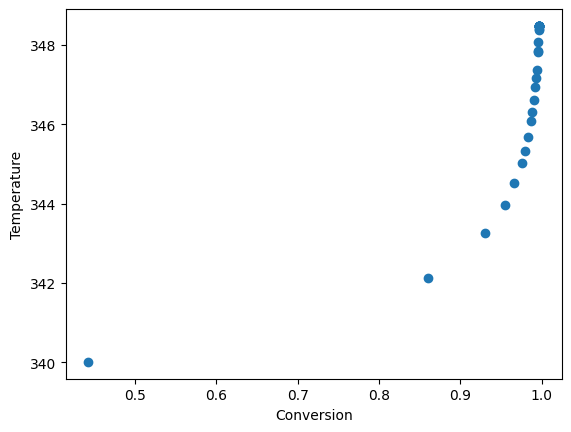

In [ ]:
plt.scatter(conversions, Temperatues)
plt.xlabel("Conversion")
plt.ylabel("Temperature")
plt.show()